In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import seaborn as sns



# Dataset 1

In [11]:
# Directory with data one level above current directory
ccfp_df = pd.read_csv('../data/credit_card_fraud_prevention/creditcard.csv')


In [12]:
ccfp_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.000,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,...,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.770,0
284803,172787.000,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,...,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.790,0
284804,172788.000,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,...,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.880,0
284805,172788.000,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,...,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.000,0
284806,172792.000,-0.533,-0.190,0.703,-0.506,-0.013,-0.650,1.577,-0.415,0.486,...,0.261,0.643,0.377,0.009,-0.474,-0.818,-0.002,0.014,217.000,0


In [72]:
# ccfp_df[ccfp_df['Class'] == 1] # 492 rows with class 1
# ccfp_df[ccfp_df['Class'] == 0] # 284315 rows with class 0


In [14]:
ccfp_df[ccfp_df['Class'] == 0].Amount.mean()

88.29102242231328

In [15]:
ccfp_df[ccfp_df['Class'] == 1].Amount.mean()

122.21132113821139

In [16]:
ccfp_df[ccfp_df['Class'] == 1].Amount.median()

9.25

In [17]:
ccfp_df[ccfp_df['Class'] == 0].Amount.median()

22.0

In [73]:
ccfp_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


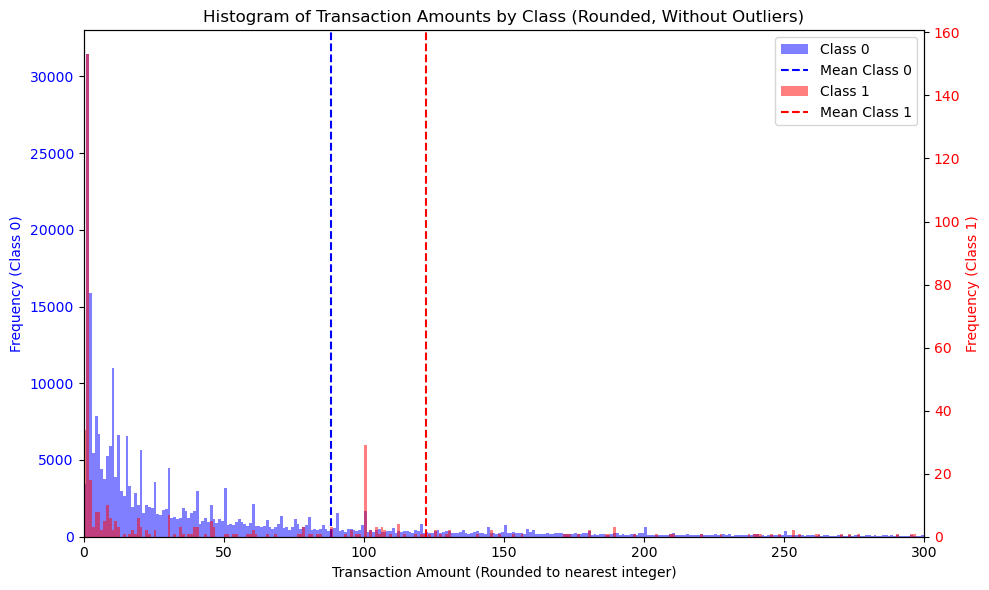

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot histogram for Class=0 on the left Y-axis
ax1.hist(ccfp_df[ccfp_df['Class'] == 0]['Amount'].round(), 
         bins=range(int(ccfp_df['Amount'].round().min()), int(ccfp_df['Amount'].round().max()) + 1, 1), 
         alpha=0.5, label='Class 0', color='blue')
ax1.set_xlabel('Transaction Amount (Rounded to nearest integer)')
ax1.set_ylabel('Frequency (Class 0)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add vertical bar for mean value of Class=0
mean_class_0 = ccfp_df[ccfp_df['Class'] == 0]['Amount'].mean()
ax1.axvline(mean_class_0, color='blue', linestyle='dashed', linewidth=1.5, label='Mean Class 0')

# Create a second Y-axis for Class=1
ax2 = ax1.twinx()

ax2.hist(ccfp_df[ccfp_df['Class'] == 1]['Amount'].round(), 
         bins=range(int(ccfp_df['Amount'].round().min()), int(ccfp_df['Amount'].round().max()) + 1, 1), 
         alpha=0.5, label='Class 1', color='red')
ax2.set_ylabel('Frequency (Class 1)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add vertical bar for mean value of Class=1
mean_class_1 = ccfp_df[ccfp_df['Class'] == 1]['Amount'].mean()
ax2.axvline(mean_class_1, color='red', linestyle='dashed', linewidth=1.5, label='Mean Class 1')

# Set X-axis limit to show only values from 0 to 300
ax1.set_xlim(0, 300)
ax2.set_xlim(0, 300)

# Add a united legend in a single pane
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

# Add title and show the plot
plt.title('Histogram of Transaction Amounts by Class (Rounded, Without Outliers)')
fig.tight_layout()
plt.show()


# Good spike at 100 transaction amount for Class 1 and 0

Text(0.5, 1.0, 'Correlation of the other features with "Class" feature')

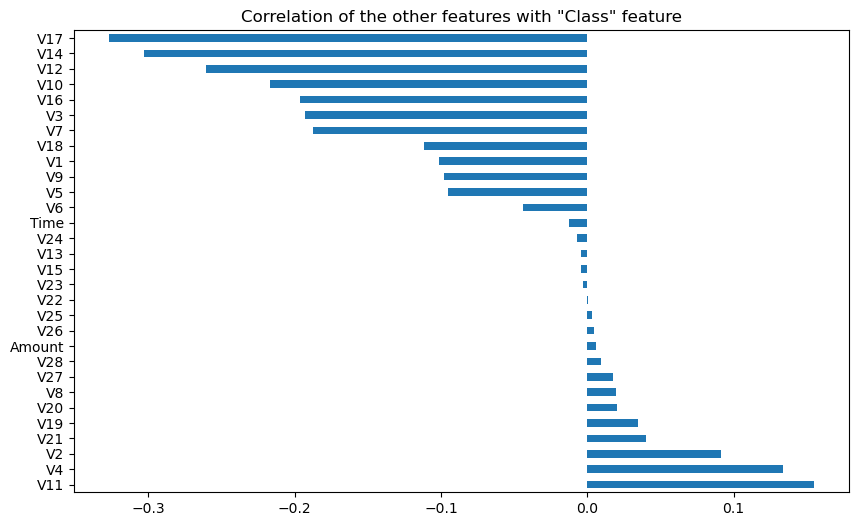

In [20]:
corr_values=ccfp_df.corr()['Class'].drop('Class')
corr_values.sort_values(ascending=False).plot(kind='barh', figsize=(10, 6)).set_title('Correlation of the other features with "Class" feature')

# Features sorted by correlation with Class

# The most correlated features with Class are:
# V17, V14, V12 -- negatively correlated, could be interpreted as trust indicators 
# V11, V4,  V2  -- positively correlated, could be interpreted as fraud indicators

# Probably we can create some model with these features and get some good results

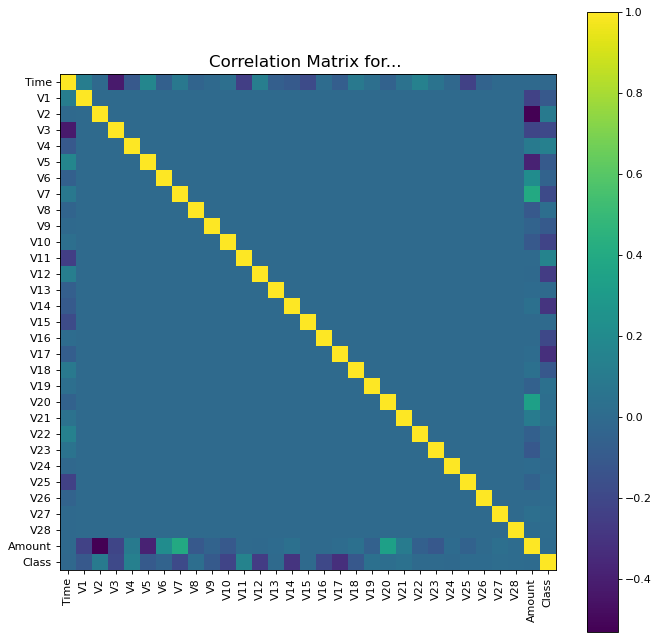

In [21]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    # df = df.dropna() # drop columns with NaN
    # df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    # if df.shape[1] < 2:
        # print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        # return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for... ', fontsize=15)
    plt.show()

plotCorrelationMatrix(ccfp_df, 10)


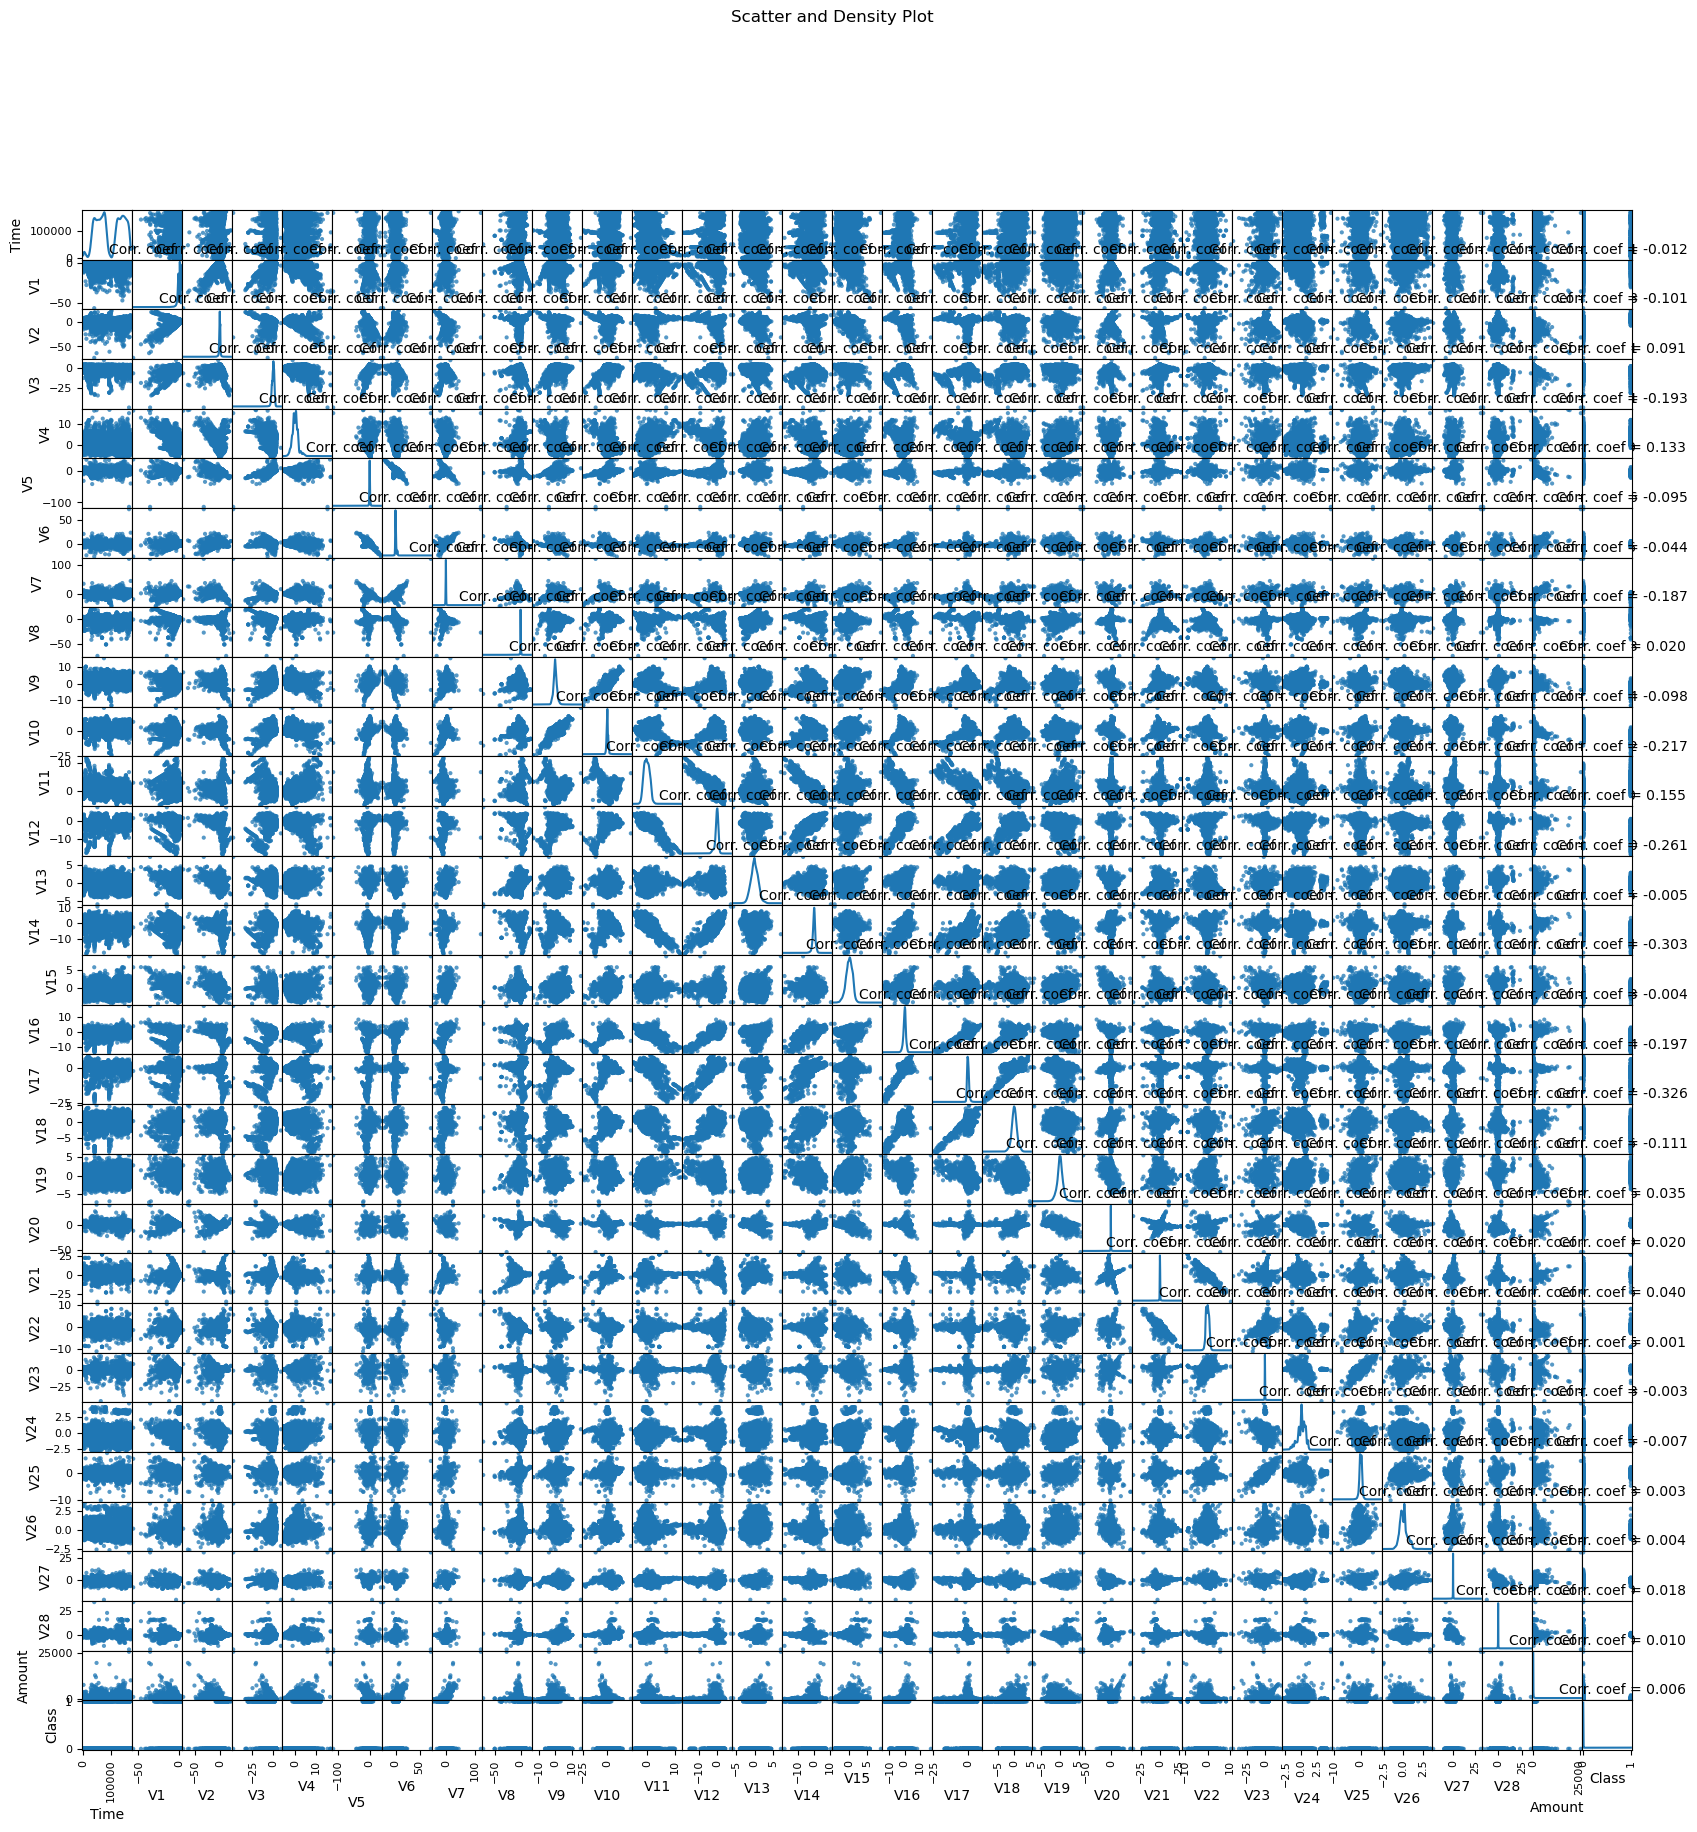

In [ ]:
%%time
# Be carefull, taking a lot of time to run


# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna()
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    #if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
    #    columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(ccfp_df, 20, 10)

In [23]:
# Generate the data dictionary
ccfp_df_data_dict = pd.DataFrame({
    #'Column Name': ccfp_df.columns,
    'Non-Null Count': ccfp_df.notnull().sum(),
    'Distinct Count': ccfp_df.nunique(),
    'Min': round(ccfp_df.min(), 2),
    'Max': round(ccfp_df.max(), 2),
    'Avg': round(ccfp_df.mean(), 2),
    'Std. Dev': round(ccfp_df.std(), 2)
})


# Display the data dictionary

In [24]:
ccfp_df_data_dict

,Non-Null Count,Distinct Count,Min,Max,Avg,Std. Dev
Time,284807,124592,0.000,172792.000,94813.860,47488.150
V1,284807,275663,-56.410,2.450,0.000,1.960
V2,284807,275663,-72.720,22.060,0.000,1.650
V3,284807,275663,-48.330,9.380,-0.000,1.520
V4,284807,275663,-5.680,16.880,0.000,1.420
V5,284807,275663,-113.740,34.800,0.000,1.380
V6,284807,275663,-26.160,73.300,0.000,1.330
V7,284807,275663,-43.560,120.590,-0.000,1.240
V8,284807,275663,-73.220,20.010,0.000,1.190
V9,284807,275663,-13.430,15.590,-0.000,1.100


# Dataset 2

In [ ]:
ibm_hi_small_df = pd.read_csv('../data/IBM/HI-Small_Trans.csv')

len(ibm_hi_small_df)

In [6]:
ibm_hi_small_df.head().round(3)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.340,US Dollar,3697.340,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.010,US Dollar,0.010,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.570,US Dollar,14675.570,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.970,US Dollar,2806.970,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.970,US Dollar,36682.970,US Dollar,Reinvestment,0


In [7]:
ibm_hi_small_df[['Timestamp', 'From Bank', 'To Bank', 'Amount Received', 'Amount Paid', 'Is Laundering']].min()

Timestamp          2022/09/01 00:00
From Bank                         1
To Bank                           1
Amount Received               0.000
Amount Paid                   0.000
Is Laundering                     0
dtype: object

In [8]:
# Generate the data dictionary
ibm_hi_small_df_data_dict = pd.DataFrame({
    'Non-Null Count': ibm_hi_small_df.notnull().sum(),
    'Distinct Count': ibm_hi_small_df.nunique(),

    # Not every aggregate function could be calculated for every column
    'Min': ibm_hi_small_df[['Timestamp', 'From Bank', 'To Bank', 'Amount Received', 'Amount Paid', 'Is Laundering']].min(),
    'Max': ibm_hi_small_df[['Timestamp', 'From Bank', 'To Bank', 'Amount Received', 'Amount Paid', 'Is Laundering']].max(), 
    'Avg': ibm_hi_small_df[['From Bank', 'To Bank', 'Amount Received', 'Amount Paid', 'Is Laundering']].mean(), 
    'Std. Dev': ibm_hi_small_df[['From Bank', 'To Bank', 'Amount Received', 'Amount Paid', 'Is Laundering']].std()
})

# Display the data dictionary
ibm_hi_small_df_data_dict

,Non-Null Count,Distinct Count,Min,Max,Avg,Std. Dev
Account,5078345,496995,NaN,NaN,NaN,NaN
Account.1,5078345,420636,NaN,NaN,NaN,NaN
Amount Paid,5078345,923873,0.000,1046302363293.480,4509273.368,869772830.919
Amount Received,5078345,915161,0.000,1046302363293.480,5988726.070,1037183108.891
From Bank,5078345,30470,1,356303,45730.566,81765.622
Is Laundering,5078345,2,0,1,0.001,0.032
Payment Currency,5078345,15,NaN,NaN,NaN,NaN
Payment Format,5078345,7,NaN,NaN,NaN,NaN
Receiving Currency,5078345,15,NaN,NaN,NaN,NaN
Timestamp,5078345,15018,2022/09/01 00:00,2022/09/18 16:18,NaN,NaN


Text(0.5, 1.0, 'Top 30 Banks with the highest amount of Laundering Transactions')

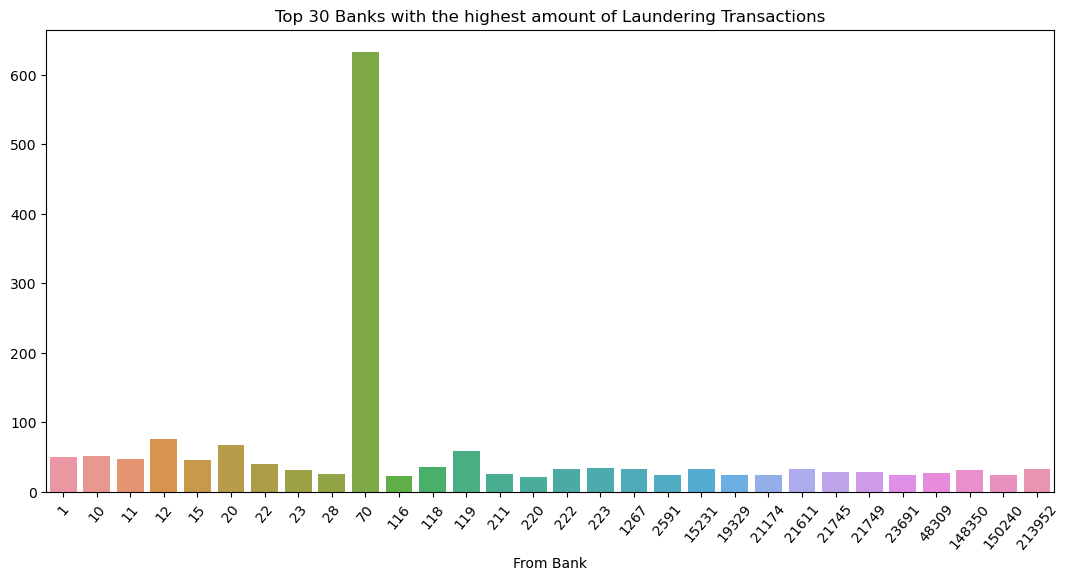

In [ ]:
plt.figure(figsize=(13, 6))
plt.xticks(rotation=50)

ibm_hi_small_df_from_bank = ibm_hi_small_df[ibm_hi_small_df["Is Laundering"] == 1]["From Bank"]\
    .value_counts().head(30)
sns.barplot(x=ibm_hi_small_df_from_bank.index, y=ibm_hi_small_df_from_bank.values)\
    .set_title('Top 30 Banks with the highest amount of Laundering Transactions')


In [78]:
ibm_hi_small_df[["From Bank", "Is Laundering"]].groupby(by="From Bank")\
    .mean()["Is Laundering"]\
    .sort_values(ascending=False).head(30)

From Bank
150240   0.275
53294    0.167
50528    0.090
142610   0.077
135981   0.061
251264   0.053
50428    0.043
16515    0.038
49365    0.038
251395   0.033
249407   0.031
250810   0.029
231212   0.028
135403   0.025
148350   0.023
49089    0.023
126984   0.022
214749   0.021
50202    0.019
232391   0.018
149012   0.018
51222    0.018
26302    0.018
23289    0.018
247415   0.016
147241   0.016
213952   0.015
27120    0.014
146265   0.014
46479    0.013
Name: Is Laundering, dtype: float64

In [ ]:
ibm_hi_small_df[["From Bank"]].value_counts(normalize=False)\
    .sort_values(ascending=False).head(30) # Top 30 banks with the most transactions

From Bank
70           449859
10            81629
12            79754
1             62211
15            52511
220           52417
20            41008
3             38413
7             31086
211           30451
116           30232
11            29676
22            28652
28            28584
1665          28310
23            26893
1292          26835
118           24988
1362          23851
14            23551
6             22855
4             22116
1420          21910
214           21727
410           21487
1674          19286
1467          19252
213           19235
119           19175
19            18828
Name: count, dtype: int64

So, looks like we have major bank '70' which has the biggest amount ot transaction and it's the very same bank used by fraudsters as default option. 

In [54]:
len(ibm_hi_small_df[(ibm_hi_small_df["Is Laundering"] == 1) & (ibm_hi_small_df["From Bank"] == 70)])
# 633 transactions from Bank 70 are laundering transactions


633

In [53]:
len(ibm_hi_small_df[(ibm_hi_small_df["Is Laundering"] == 0) & (ibm_hi_small_df["From Bank"] == 70)])
# 449226 transactions from Bank 70 are not laundering transactions


449226

In [92]:
633 / (633 + 449226)

0.0014071075603689157

Text(0.5, 1.0, 'Top 30 Banks with the highest number of Transactions')

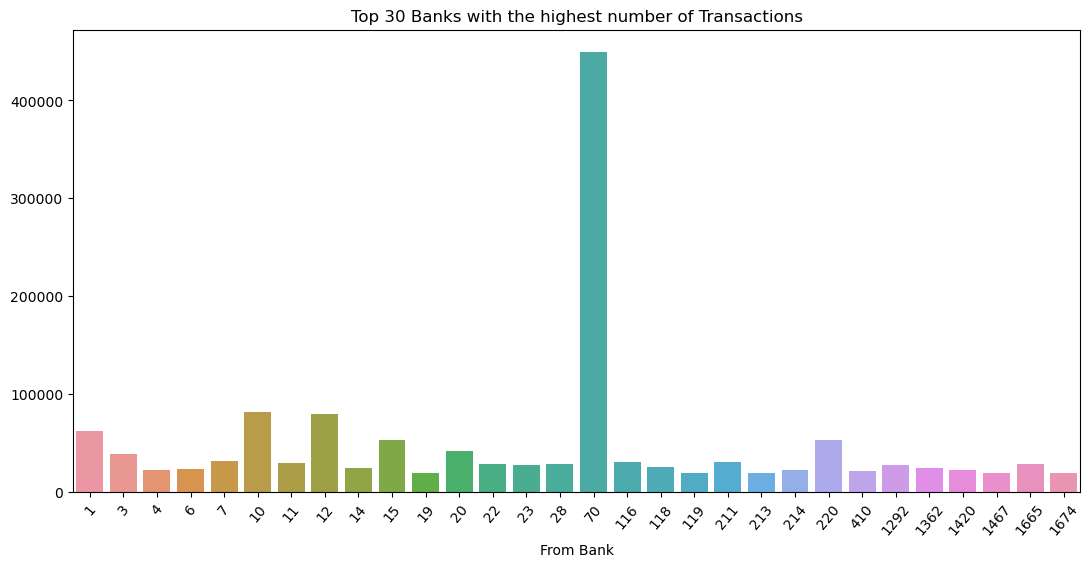

In [94]:
plt.figure(figsize=(13, 6))
plt.xticks(rotation=50)

ibm_hi_small_df_from_bank = ibm_hi_small_df["From Bank"].value_counts().head(30)
sns.barplot(x=ibm_hi_small_df_from_bank.index, y=ibm_hi_small_df_from_bank.values)\
    .set_title('Top 30 Banks with the highest number of Transactions')


In [72]:
ibm_hi_small_df[["From Bank", "Is Laundering"]].groupby(by="From Bank")\
    .mean()\
    .sort_values(by="Is Laundering", ascending=False).head(30)

,Is Laundering
From Bank,
150240,0.275
53294,0.167
50528,0.090
142610,0.077
135981,0.061
251264,0.053
50428,0.043
16515,0.038
49365,0.038


Text(0.5, 1.0, 'Top 30 Banks with the highest share of Laundering Transactions (y-axis is in part of all transactions)')

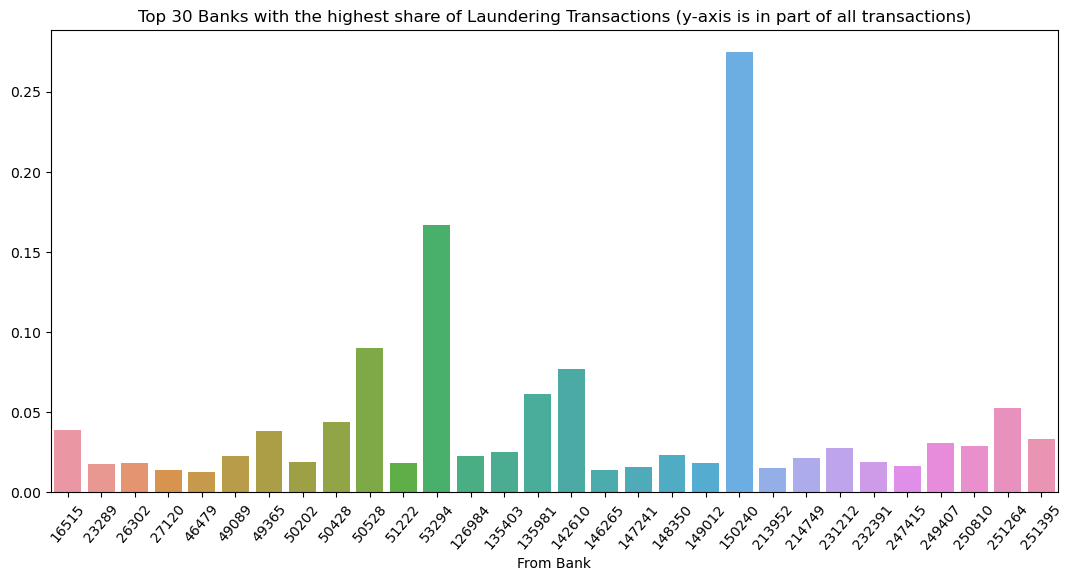

In [106]:
plt.figure(figsize=(13, 6))
plt.xticks(rotation=50)

ibm_hi_small_df_from_bank_share = (ibm_hi_small_df[["From Bank", "Is Laundering"]]\
    .groupby(by="From Bank").mean()\
    .sort_values(by="Is Laundering", ascending=False)["Is Laundering"].head(30))

sns.barplot(x=ibm_hi_small_df_from_bank_share.index, y=ibm_hi_small_df_from_bank_share.values)\
    .set_title('Top 30 Banks with the highest share of Laundering Transactions (y-axis is in part of all transactions)')

# So, some banks have a very high share of laundering transactions, up to 27% of all transactions from this bank
# That's a good news, because we can use this information to detect laundering transactions
# But at the same time, such banks are not very common, i.e. bank 150240 -- is the only 91 transactions from this bank

In [ ]:
ibm_hi_small_df[ibm_hi_small_df["From Bank"] == 150240]["Is Laundering"].mean()
# 27% of transactions from this bank are laundering

ibm_hi_small_df[ibm_hi_small_df["From Bank"] == 150240]["Is Laundering"].sum()
# Its 25 laundering transactions out of 91 total transactions from this bank

ibm_hi_small_df[ibm_hi_small_df["From Bank"] == 150240]["From Bank"].count()

91